In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

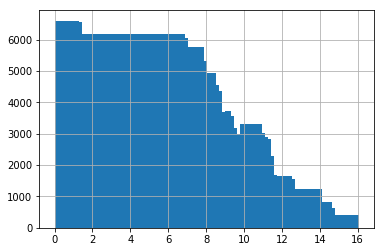

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
rawydf=ydf


In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
def align_q(t):
    print 'align to ', t
    ydf=rawydf.copy()
    for qno in quakes:
        r=t/quake_duration[qno]
        print qno, r
        ydf.loc[qdf['index']==qno] *= r
    return ydf

align to  11
1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


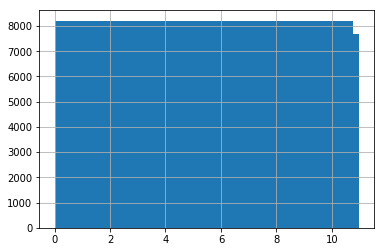

In [26]:
align_q(11).hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
str(config.quake_weights)

'{1: 1.25, 2: 0.666666666666667, 3: 0.25, 4: 1.25, 5: 0.25, 6: 0.25, 7: 0.666666666666667, 8: 0.25, 9: 0.25, 10: 1.25, 11: 1.25, 12: 0.25, 13: 0.25, 14: 0.666666666666667, 15: 0.25}'

In [29]:
str(config.target_lengths)

'[11.4252837645, 12.6407394841, 11.6683749084, 7.0496431738, 11.4252837645, 16.5301977869, 9.723645757, 12.6407394841, 16.5301977869]'

In [30]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    0.416667
quake_06_0120_099000    0.416667
quake_07_0296_013500    1.111111
quake_03_0090_034500    0.416667
quake_08_0137_055500    0.416667
Name: index, dtype: float64

In [31]:
GNO=403
for u in range(len(config.target_lengths)):
    !mkdir -p input/sub/{GNO}/{u}

In [32]:
sub_path=os.path.join(config.INPUT_PATH, "sub", str(GNO))
sub_path

'/home/hadoop/lanlep2019/input/sub/403'

In [33]:
def make_sub(model, qno):
    fname =os.path.join(sub_path, str(targetno), "sub{}_q{}_at_s{}.csv".format(GNO,qno, randseed, targetno))
    print "write to " + fname    
    p = model.predict(testdf.values, num_iteration = model.best_iteration)
    p = pd.DataFrame(p, index=testdf.index).reset_index()
    p.columns=['seg_id','time_to_failure']
    p.to_csv(fname,index=None)

                        
    

In [34]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    t=config.target_lengths[targetno]
    ydf=align_q(t)    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    make_sub(model, qno)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [35]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'fair',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "metric": 'mae',
          'seed': 1,
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [36]:
best_mae=1e10

In [41]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf, seed,fair_c):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [42]:
best={'colsample_bytree': 0.6451514050646995,
 'fair_c': 0.7277079006514405,
 'learning_rate': 0.002644075119419426,
 'max_depth': 4.689630529444919,
 'min_data_in_leaf': 526.6028978484759,
 'min_sum_hessian_in_leaf': 0.019123810510874733,
 'num_leaves': 67.66220364033194,
 'reg_alpha': 1.0266272254897302,
 'reg_lambda': 6.1335362892235565,
 'subsample': 0.41274807543837455}

In [43]:
import time


In [45]:
while True:
    if os.path.exists("/mnt/done402"):
        break
    else:
        time.sleep(60) 

In [46]:
scores={}
for targetno in range(0,len(config.target_lengths)):
    ascores=[]
    for _ in range(2):
        randseed=np.random.randint(low=1, high=11111111)
        best['seed']=randseed
        a=lgbcv(**best)
        ascores.append(a)
    scores[targetno]=ascores

valid quake 1
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(379874, 450) (379874,) (29520, 450) (29520,)


/home/hadoop/miniconda2/lib/python2.7/site-packages/lightgbm/sklearn.py:258: LGBMDeprecationWarning: The `seed` parameter is deprecated and will be removed in next version. Please use `random_state` instead.
  'Please use `random_state` instead.', LGBMDeprecationWarning)


Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.81639	valid_1's l1: 1.94688
[200]	training's l1: 1.4551	valid_1's l1: 1.66472
[300]	training's l1: 1.2816	valid_1's l1: 1.51745
[400]	training's l1: 1.18569	valid_1's l1: 1.42656
[500]	training's l1: 1.12868	valid_1's l1: 1.367
[600]	training's l1: 1.09271	valid_1's l1: 1.32861
[700]	training's l1: 1.06853	valid_1's l1: 1.30476
[800]	training's l1: 1.05137	valid_1's l1: 1.29015
[900]	training's l1: 1.03904	valid_1's l1: 1.27953
[1000]	training's l1: 1.02943	valid_1's l1: 1.27205
[1100]	training's l1: 1.021	valid_1's l1: 1.26642
[1200]	training's l1: 1.01374	valid_1's l1: 1.26262
[1300]	training's l1: 1.00711	valid_1's l1: 1.26055
[1400]	training's l1: 1.0013	valid_1's l1: 1.26
[1500]	training's l1: 0.995877	valid_1's l1: 1.25885
[1600]	training's l1: 0.991258	valid_1's l1: 1.25819
[1700]	training's l1: 0.987158	valid_1's l1: 1.25798
[1800]	training's l1: 0.983236	valid_1's l1: 1.2579
Early stopping, b

[800]	training's l1: 1.04238	valid_1's l1: 1.38667
[900]	training's l1: 1.0293	valid_1's l1: 1.37824
[1000]	training's l1: 1.01894	valid_1's l1: 1.37201
[1100]	training's l1: 1.00955	valid_1's l1: 1.36709
[1200]	training's l1: 1.00153	valid_1's l1: 1.36304
[1300]	training's l1: 0.994321	valid_1's l1: 1.35995
[1400]	training's l1: 0.987731	valid_1's l1: 1.35792
[1500]	training's l1: 0.981883	valid_1's l1: 1.35676
[1600]	training's l1: 0.976902	valid_1's l1: 1.35566
[1700]	training's l1: 0.972054	valid_1's l1: 1.35483
[1800]	training's l1: 0.967759	valid_1's l1: 1.35423
[1900]	training's l1: 0.963662	valid_1's l1: 1.3539
[2000]	training's l1: 0.959669	valid_1's l1: 1.35396
Early stopping, best iteration is:
[1904]	training's l1: 0.963459	valid_1's l1: 1.35383
write to /home/hadoop/lanlep2019/input/sub/403/0/sub403_q7_at_s6655360.csv
quake  7 (1.3538285683004418, 1904)
valid quake 8
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352


write to /home/hadoop/lanlep2019/input/sub/403/0/sub403_q13_at_s6655360.csv
quake  13 (1.198057359749581, 1409)
valid quake 14
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.80312	valid_1's l1: 2.01476
[200]	training's l1: 1.44889	valid_1's l1: 1.73326
[300]	training's l1: 1.2782	valid_1's l1: 1.59428
[400]	training's l1: 1.1838	valid_1's l1: 1.51608
[500]	training's l1: 1.12686	valid_1's l1: 1.47033
[600]	training's l1: 1.09004	valid_1's l1: 1.44097
[700]	training's l1: 1.06526	valid_1's l1: 1.42277
[800]	training's l1: 1.04749	valid_1's l1: 1.41022
[900]	training's l1: 1.03464	valid_1's l1: 1.4018
[1000]	training's l1: 1.02403	vali

7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.82396	valid_1's l1: 1.78855
[200]	training's l1: 1.46807	valid_1's l1: 1.54718
[300]	training's l1: 1.29524	valid_1's l1: 1.47078
[400]	training's l1: 1.20014	valid_1's l1: 1.44569
[500]	training's l1: 1.14324	valid_1's l1: 1.43435
[600]	training's l1: 1.1067	valid_1's l1: 1.42898
[700]	training's l1: 1.08206	valid_1's l1: 1.42873
Early stopping, best iteration is:
[676]	training's l1: 1.08715	valid_1's l1: 1.42814
write to /home/hadoop/lanlep2019/input/sub/403/0/sub403_q5_at_s7336466.csv
quake  5 (1.428139693267197, 676)
valid quake 6
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.

[700]	training's l1: 1.11369	valid_1's l1: 0.990875
[800]	training's l1: 1.0952	valid_1's l1: 0.981413
[900]	training's l1: 1.08155	valid_1's l1: 0.976201
[1000]	training's l1: 1.07049	valid_1's l1: 0.974899
[1100]	training's l1: 1.06055	valid_1's l1: 0.974376
[1200]	training's l1: 1.052	valid_1's l1: 0.974234
Early stopping, best iteration is:
[1152]	training's l1: 1.05601	valid_1's l1: 0.974134
write to /home/hadoop/lanlep2019/input/sub/403/0/sub403_q11_at_s7336466.csv
quake  11 (0.9741337080442788, 1152)
valid quake 12
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.83134	valid_1's l1: 1.66758
[200]	training's l1: 1.47606	valid_1's

[1600]	training's l1: 1.09799	valid_1's l1: 1.42552
[1700]	training's l1: 1.09372	valid_1's l1: 1.42481
[1800]	training's l1: 1.08896	valid_1's l1: 1.42388
[1900]	training's l1: 1.08487	valid_1's l1: 1.42213
[2000]	training's l1: 1.08057	valid_1's l1: 1.42099
[2100]	training's l1: 1.07613	valid_1's l1: 1.42027
[2200]	training's l1: 1.07164	valid_1's l1: 1.41996
[2300]	training's l1: 1.06712	valid_1's l1: 1.42011
Early stopping, best iteration is:
[2225]	training's l1: 1.07061	valid_1's l1: 1.41927
write to /home/hadoop/lanlep2019/input/sub/403/1/sub403_q2_at_s1050098.csv
quake  2 (1.4192737817418206, 2225)
valid quake 3
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100

[1100]	training's l1: 1.15159	valid_1's l1: 1.07852
[1200]	training's l1: 1.14329	valid_1's l1: 1.07781
[1300]	training's l1: 1.13579	valid_1's l1: 1.07777
[1400]	training's l1: 1.12909	valid_1's l1: 1.07756
[1500]	training's l1: 1.12338	valid_1's l1: 1.07764
Early stopping, best iteration is:
[1467]	training's l1: 1.12521	valid_1's l1: 1.07742
write to /home/hadoop/lanlep2019/input/sub/403/1/sub403_q9_at_s1050098.csv
quake  9 (1.077416351785757, 1467)
valid quake 10
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.02164	valid_1's l1: 1.99028
[200]	training's l1: 1.63792	valid_1's l1: 1.55919
[300]	training's l1: 1.45197	valid_1's l1: 1.

13 1.47572410529
14 0.856909838535
15 1.33630130398
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.9847	valid_1's l1: 2.1366
[200]	training's l1: 1.59179	valid_1's l1: 1.83031
[300]	training's l1: 1.40592	valid_1's l1: 1.67269
[400]	training's l1: 1.30368	valid_1's l1: 1.57371
[500]	training's l1: 1.24295	valid_1's l1: 1.5119
[600]	training's l1: 1.20437	valid_1's l1: 1.4712
[700]	training's l1: 1.1783	valid_1's l1: 1.44576
[800]	training's l1: 1.16008	valid_1's l1: 1.42951
[900]	training's l1: 1.14676	valid_1's l1: 1.41892
[1000]	training's l1: 1.13647	valid_1's l1: 1.41151
[1100]	training's l1: 1.12751	valid_1's l1: 1.40583
[1200]	training's l1: 1.11983	valid_1's l1: 1.40221
[1300]	training's l1: 1.1126	valid_1's l1: 1.39987
[1400]	training's l1: 1.10587	valid_1's l1: 1.39862
[1500]	training's l1: 1.1	valid_1's l1: 1.39774
[1600]	training's l1: 1.09481	valid_1's l1: 1.39757
[1700]	training's l1: 1.09

[900]	training's l1: 1.13688	valid_1's l1: 1.52266
[1000]	training's l1: 1.1257	valid_1's l1: 1.51561
[1100]	training's l1: 1.11535	valid_1's l1: 1.51025
[1200]	training's l1: 1.10638	valid_1's l1: 1.5052
[1300]	training's l1: 1.09855	valid_1's l1: 1.50245
[1400]	training's l1: 1.09107	valid_1's l1: 1.50025
[1500]	training's l1: 1.0846	valid_1's l1: 1.49875
[1600]	training's l1: 1.07895	valid_1's l1: 1.49723
[1700]	training's l1: 1.07368	valid_1's l1: 1.49609
[1800]	training's l1: 1.06854	valid_1's l1: 1.49587
Early stopping, best iteration is:
[1745]	training's l1: 1.07128	valid_1's l1: 1.49574
write to /home/hadoop/lanlep2019/input/sub/403/1/sub403_q7_at_s370856.csv
quake  7 (1.4957417323767253, 1745)
valid quake 8
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(

(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.97151	valid_1's l1: 2.21116
[200]	training's l1: 1.5862	valid_1's l1: 1.90272
[300]	training's l1: 1.40326	valid_1's l1: 1.75318
[400]	training's l1: 1.30217	valid_1's l1: 1.66933
[500]	training's l1: 1.24101	valid_1's l1: 1.6207
[600]	training's l1: 1.20176	valid_1's l1: 1.59012
[700]	training's l1: 1.17481	valid_1's l1: 1.57008
[800]	training's l1: 1.15569	valid_1's l1: 1.55661
[900]	training's l1: 1.14172	valid_1's l1: 1.54693
[1000]	training's l1: 1.12979	valid_1's l1: 1.53991
[1100]	training's l1: 1.11966	valid_1's l1: 1.5345
[1200]	training's l1: 1.11057	valid_1's l1: 1.53117
[1300]	training's l1: 1.1028	valid_1's l1: 1.52899
[1400]	training's l1: 1.09566	valid_1's l1: 1.52774
[1500]	training's l1: 1.08991	valid_1's l1: 1.52726
[1600]	training's l1: 1.08448	valid_1's l1: 1.52686
[1700]	training's l1: 1.07931	valid_1's l1: 1.52683
Early stopping, best

[200]	training's l1: 1.49535	valid_1's l1: 1.57906
[300]	training's l1: 1.32062	valid_1's l1: 1.50379
[400]	training's l1: 1.22464	valid_1's l1: 1.47838
[500]	training's l1: 1.16699	valid_1's l1: 1.46669
[600]	training's l1: 1.12986	valid_1's l1: 1.46273
[700]	training's l1: 1.10469	valid_1's l1: 1.46258
Early stopping, best iteration is:
[670]	training's l1: 1.11129	valid_1's l1: 1.46225
write to /home/hadoop/lanlep2019/input/sub/403/2/sub403_q5_at_s8593494.csv
quake  5 (1.4622481192102808, 670)
valid quake 6
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.86131	valid_1's l1: 1.99091
[200]	training's l1: 1.49841	valid_1's l1: 1.72293

write to /home/hadoop/lanlep2019/input/sub/403/2/sub403_q11_at_s8593494.csv
quake  11 (0.9920476395986965, 1128)
valid quake 12
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.86579	valid_1's l1: 1.69465
[200]	training's l1: 1.50363	valid_1's l1: 1.32334
[300]	training's l1: 1.32812	valid_1's l1: 1.18004
[400]	training's l1: 1.23158	valid_1's l1: 1.12562
[500]	training's l1: 1.17384	valid_1's l1: 1.10299
[600]	training's l1: 1.13637	valid_1's l1: 1.09391
[700]	training's l1: 1.11109	valid_1's l1: 1.0911
Early stopping, best iteration is:
[699]	training's l1: 1.11129	valid_1's l1: 1.09105
write to /home/hadoop/lanlep2019/input/sub/403/

write to /home/hadoop/lanlep2019/input/sub/403/2/sub403_q2_at_s2682584.csv
quake  2 (1.3095795136987687, 2217)
valid quake 3
align to  11.6683749084
1 1.01107471752
2 0.822863707616
3 1.31753096322
4 0.919212765562
5 1.44857054657
6 1.65292049795
7 0.724428800351
8 1.47586161325
9 1.21076700766
10 1.02114781011
11 1.05839874655
12 1.32165912535
13 1.36220686642
14 0.790993697109
15 1.23350889599
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.86718	valid_1's l1: 1.6043
[200]	training's l1: 1.50673	valid_1's l1: 1.18951
[300]	training's l1: 1.33225	valid_1's l1: 1.02581
[400]	training's l1: 1.23539	valid_1's l1: 0.959667
[500]	training's l1: 1.17739	valid_1's l1: 0.935965
[600]	training's l1: 1.13981	valid_1's l1: 0.929866
Early stopping, best iteration is:
[599]	training's l1: 1.14011	valid_1's l1: 0.929823
write to /home/hadoop/lanlep2019/input/sub/403/2/sub403_q3_at_s2682584.csv
quake  3 (0.9298234210

(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.88169	valid_1's l1: 1.85335
[200]	training's l1: 1.52287	valid_1's l1: 1.45232
[300]	training's l1: 1.34699	valid_1's l1: 1.2573
[400]	training's l1: 1.24967	valid_1's l1: 1.15829
[500]	training's l1: 1.19109	valid_1's l1: 1.10296
[600]	training's l1: 1.15336	valid_1's l1: 1.07067
[700]	training's l1: 1.12759	valid_1's l1: 1.05076
[800]	training's l1: 1.10931	valid_1's l1: 1.03887
[900]	training's l1: 1.09569	valid_1's l1: 1.031
[1000]	training's l1: 1.08469	valid_1's l1: 1.02606
[1100]	training's l1: 1.07563	valid_1's l1: 1.02233
[1200]	training's l1: 1.06702	valid_1's l1: 1.01937
[1300]	training's l1: 1.0591	valid_1's l1: 1.01714
[1400]	training's l1: 1.05271	valid_1's l1: 1.01607
[1500]	training's l1: 1.04725	valid_1's l1: 1.01517
[1600]	training's l1: 1.04276	valid_1's l1: 1.01447
[1700]	training's l1: 1.03846	valid_1's l1: 1.01389
[1800]	training's l1

[500]	training's l1: 0.712722	valid_1's l1: 0.853759
[600]	training's l1: 0.685982	valid_1's l1: 0.824311
[700]	training's l1: 0.668151	valid_1's l1: 0.805401
[800]	training's l1: 0.655632	valid_1's l1: 0.793655
[900]	training's l1: 0.646591	valid_1's l1: 0.785636
[1000]	training's l1: 0.639823	valid_1's l1: 0.780493
[1100]	training's l1: 0.634311	valid_1's l1: 0.776447
[1200]	training's l1: 0.629553	valid_1's l1: 0.773362
[1300]	training's l1: 0.625187	valid_1's l1: 0.771605
[1400]	training's l1: 0.621188	valid_1's l1: 0.7704
[1500]	training's l1: 0.617702	valid_1's l1: 0.77009
[1600]	training's l1: 0.614697	valid_1's l1: 0.769706
[1700]	training's l1: 0.611993	valid_1's l1: 0.769547
[1800]	training's l1: 0.609541	valid_1's l1: 0.76932
[1900]	training's l1: 0.607041	valid_1's l1: 0.769331
[2000]	training's l1: 0.60469	valid_1's l1: 0.768978
[2100]	training's l1: 0.602452	valid_1's l1: 0.76892
Early stopping, best iteration is:
[2074]	training's l1: 0.602975	valid_1's l1: 0.768884
writ

[600]	training's l1: 0.682452	valid_1's l1: 0.877093
[700]	training's l1: 0.663697	valid_1's l1: 0.863203
[800]	training's l1: 0.650455	valid_1's l1: 0.854251
[900]	training's l1: 0.64085	valid_1's l1: 0.848319
[1000]	training's l1: 0.633626	valid_1's l1: 0.844138
[1100]	training's l1: 0.627468	valid_1's l1: 0.840837
[1200]	training's l1: 0.622279	valid_1's l1: 0.838286
[1300]	training's l1: 0.617581	valid_1's l1: 0.836482
[1400]	training's l1: 0.613313	valid_1's l1: 0.8351
[1500]	training's l1: 0.609437	valid_1's l1: 0.834173
[1600]	training's l1: 0.606293	valid_1's l1: 0.833657
[1700]	training's l1: 0.603307	valid_1's l1: 0.832968
[1800]	training's l1: 0.600611	valid_1's l1: 0.832788
[1900]	training's l1: 0.597903	valid_1's l1: 0.832688
[2000]	training's l1: 0.595368	valid_1's l1: 0.832465
[2100]	training's l1: 0.593005	valid_1's l1: 0.832519
Early stopping, best iteration is:
[2065]	training's l1: 0.593829	valid_1's l1: 0.83221
write to /home/hadoop/lanlep2019/input/sub/403/3/sub403

[800]	training's l1: 0.666508	valid_1's l1: 0.741293
[900]	training's l1: 0.656877	valid_1's l1: 0.739503
[1000]	training's l1: 0.649732	valid_1's l1: 0.738728
[1100]	training's l1: 0.64368	valid_1's l1: 0.738405
[1200]	training's l1: 0.638369	valid_1's l1: 0.737943
[1300]	training's l1: 0.633885	valid_1's l1: 0.737539
Early stopping, best iteration is:
[1288]	training's l1: 0.634376	valid_1's l1: 0.737472
write to /home/hadoop/lanlep2019/input/sub/403/3/sub403_q13_at_s8456938.csv
quake  13 (0.7374716436215134, 1288)
valid quake 14
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.17862	valid_1's l1: 1.29156
[200]	training's l1

[800]	training's l1: 0.676794	valid_1's l1: 0.686541
[900]	training's l1: 0.667148	valid_1's l1: 0.682685
[1000]	training's l1: 0.659845	valid_1's l1: 0.680947
[1100]	training's l1: 0.654007	valid_1's l1: 0.679306
[1200]	training's l1: 0.649108	valid_1's l1: 0.678294
[1300]	training's l1: 0.644579	valid_1's l1: 0.677723
[1400]	training's l1: 0.640559	valid_1's l1: 0.67786
Early stopping, best iteration is:
[1343]	training's l1: 0.642787	valid_1's l1: 0.67733
write to /home/hadoop/lanlep2019/input/sub/403/3/sub403_q4_at_s1657702.csv
quake  4 (0.6773304041006506, 1343)
valid quake 5
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1:

write to /home/hadoop/lanlep2019/input/sub/403/3/sub403_q10_at_s1657702.csv
quake  10 (0.6134021565766455, 2116)
valid quake 11
align to  7.0496431738
1 0.610857641832
2 0.49714682335
3 0.796008290273
4 0.555357712525
5 0.875178038551
6 0.998639467507
7 0.437675733544
8 0.891666391336
9 0.731505067123
10 0.616943468607
11 0.639449242705
12 0.798502388232
13 0.822999981795
14 0.477892025335
15 0.745244957989
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.20465	valid_1's l1: 1.17694
[200]	training's l1: 0.976649	valid_1's l1: 0.914369
[300]	training's l1: 0.855925	valid_1's l1: 0.77395
[400]	training's l1: 0.786284	valid_1's l1: 0.697554
[500]	training's l1: 0.743562	valid_1's l1: 0.656221
[600]	training's l1: 0.716149	valid_1's l1: 0.632409
[700]	training's l1: 0.697418	valid_1's l1: 0.618194
[800]	training's l1: 0.683942	valid_1's l1: 0.610029
[900]	training's l1: 0.673914	valid_1's l1: 0.605281
[1000]

(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.81992	valid_1's l1: 1.98862
[200]	training's l1: 1.46333	valid_1's l1: 1.68823
[300]	training's l1: 1.28987	valid_1's l1: 1.53544
[400]	training's l1: 1.19389	valid_1's l1: 1.44788
[500]	training's l1: 1.13666	valid_1's l1: 1.39434
[600]	training's l1: 1.09995	valid_1's l1: 1.35894
[700]	training's l1: 1.0751	valid_1's l1: 1.33656
[800]	training's l1: 1.05749	valid_1's l1: 1.32194
[900]	training's l1: 1.04429	valid_1's l1: 1.31199
[1000]	training's l1: 1.03398	valid_1's l1: 1.30541
[1100]	training's l1: 1.02499	valid_1's l1: 1.29909
[1200]	training's l1: 1.01695	valid_1's l1: 1.29414
[1300]	training's l1: 1.01009	valid_1's l1: 1.29179
[1400]	training's l1: 1.00396	valid_1's l1: 1.29035
[1500]	training's l1: 0.99867	valid_1's l1: 1.28878
[1600]	training's l1: 0.994404	valid_1's l1: 1.28708
[1700]	training's l1: 0.990502	valid_1's l1: 1.28594
[1800]	training

align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.83325	valid_1's l1: 1.70823
[200]	training's l1: 1.47736	valid_1's l1: 1.3129
[300]	training's l1: 1.30523	valid_1's l1: 1.15044
[400]	training's l1: 1.21028	valid_1's l1: 1.06916
[500]	training's l1: 1.15316	valid_1's l1: 1.02831
[600]	training's l1: 1.1163	valid_1's l1: 1.00542
[700]	training's l1: 1.09172	valid_1's l1: 0.99143
[800]	training's l1: 1.07436	valid_1's l1: 0.984042
[900]	training's l1: 1.06147	valid_1's l1: 0.980617
[1000]	training's l1: 1.05164	valid_1's l1: 0.978
[1100]	training's l1: 1.04254	valid_1's l1: 0.976216
[1200]	training's l1: 1.03468	valid_1's l1: 0.976138
[1

write to /home/hadoop/lanlep2019/input/sub/403/4/sub403_q14_at_s237968.csv
quake  14 (1.38233989454842, 1512)
valid quake 15
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.82923	valid_1's l1: 1.78918
[200]	training's l1: 1.47189	valid_1's l1: 1.42689
[300]	training's l1: 1.29935	valid_1's l1: 1.29337
[400]	training's l1: 1.20398	valid_1's l1: 1.2492
[500]	training's l1: 1.14663	valid_1's l1: 1.23837
[600]	training's l1: 1.10955	valid_1's l1: 1.23801
Early stopping, best iteration is:
[530]	training's l1: 1.13388	valid_1's l1: 1.23697
write to /home/hadoop/lanlep2019/input/sub/403/4/sub403_q15_at_s237968.csv
quake  15 (1.2369665548926

[500]	training's l1: 1.14536	valid_1's l1: 1.48732
[600]	training's l1: 1.10857	valid_1's l1: 1.47033
[700]	training's l1: 1.08374	valid_1's l1: 1.45963
[800]	training's l1: 1.06624	valid_1's l1: 1.4545
[900]	training's l1: 1.05328	valid_1's l1: 1.45099
[1000]	training's l1: 1.04308	valid_1's l1: 1.44898
[1100]	training's l1: 1.03422	valid_1's l1: 1.44893
Early stopping, best iteration is:
[1061]	training's l1: 1.03754	valid_1's l1: 1.44846
write to /home/hadoop/lanlep2019/input/sub/403/4/sub403_q6_at_s10078797.csv
quake  6 (1.4484584446452087, 1061)
valid quake 7
align to  11.4252837645
1 0.990010660905
2 0.805720713709
3 1.29008240148
4 0.900062499615
5 1.41839199352
6 1.61848465424
7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.81988	valid_1's l1: 2.0

7 0.709336533679
8 1.44511449631
9 1.185542695
10 0.999873897403
11 1.03634877267
12 1.29412456025
13 1.33382755671
14 0.774514661754
15 1.20781079399
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.82381	valid_1's l1: 1.65346
[200]	training's l1: 1.46987	valid_1's l1: 1.42775
[300]	training's l1: 1.29873	valid_1's l1: 1.32396
[400]	training's l1: 1.20421	valid_1's l1: 1.26676
[500]	training's l1: 1.14744	valid_1's l1: 1.23645
[600]	training's l1: 1.11089	valid_1's l1: 1.2214
[700]	training's l1: 1.0859	valid_1's l1: 1.21303
[800]	training's l1: 1.06818	valid_1's l1: 1.20907
[900]	training's l1: 1.05528	valid_1's l1: 1.20683
[1000]	training's l1: 1.04528	valid_1's l1: 1.20609
[1100]	training's l1: 1.03632	valid_1's l1: 1.20499
[1200]	training's l1: 1.02829	valid_1's l1: 1.20409
[1300]	training's l1: 1.02136	valid_1's l1: 1.2035
[1400]	training's l1: 1.01529	valid_1's l1: 1.20303
[1500]	training's l1: 1.

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.57021	valid_1's l1: 2.52348
[200]	training's l1: 2.08665	valid_1's l1: 2.02254
[300]	training's l1: 1.86027	valid_1's l1: 1.80936
[400]	training's l1: 1.73601	valid_1's l1: 1.70368
[500]	training's l1: 1.66106	valid_1's l1: 1.64654
[600]	training's l1: 1.61321	valid_1's l1: 1.6144
[700]	training's l1: 1.58102	valid_1's l1: 1.59615
[800]	training's l1: 1.55761	valid_1's l1: 1.58496
[900]	training's l1: 1.54011	valid_1's l1: 1.57903
[1000]	training's l1: 1.52645	valid_1's l1: 1.57646
[1100]	training's l1: 1.51478	valid_1's l1: 1.5748
[1200]	training's l1: 1.50383	valid_1's l1: 1.57241
[1300]	training's l1: 1.49449	valid_1's l1: 1.57126
[1400]	training's l1: 1.48557	valid_1's l1: 1.57157
Early stopping, best iteration is:
[1312]	training's l1: 1.49332	valid_1's l1: 1.5712
write to /home/hadoop/lanlep2019/input/sub/403/5/sub403_q4_at_s8222703.csv
quake  4 (1.5711995186488164, 1312)
valid quake 5
align to 

[2100]	training's l1: 1.44899	valid_1's l1: 1.43239
[2200]	training's l1: 1.44339	valid_1's l1: 1.43217
[2300]	training's l1: 1.43827	valid_1's l1: 1.43188
[2400]	training's l1: 1.43318	valid_1's l1: 1.4319
[2500]	training's l1: 1.42784	valid_1's l1: 1.43161
[2600]	training's l1: 1.42249	valid_1's l1: 1.43178
Early stopping, best iteration is:
[2546]	training's l1: 1.42543	valid_1's l1: 1.43142
write to /home/hadoop/lanlep2019/input/sub/403/5/sub403_q10_at_s8222703.csv
quake  10 (1.4314218894068955, 2546)
valid quake 11
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.58668	valid_1's l1: 2.52759
[200]	training's l1: 2.10456	valid_1's l1: 1

6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.52816	valid_1's l1: 2.79181
[200]	training's l1: 2.04523	valid_1's l1: 2.3846
[300]	training's l1: 1.82063	valid_1's l1: 2.19055
[400]	training's l1: 1.69787	valid_1's l1: 2.07839
[500]	training's l1: 1.62465	valid_1's l1: 2.00741
[600]	training's l1: 1.57747	valid_1's l1: 1.96382
[700]	training's l1: 1.54541	valid_1's l1: 1.935
[800]	training's l1: 1.52161	valid_1's l1: 1.9186
[900]	training's l1: 1.50393	valid_1's l1: 1.90558
[1000]	training's l1: 1.48988	valid_1's l1: 1.89529
[1100]	training's l1: 1.47733	valid_1's l1: 1.88824
[1200]	training's l1: 1.46596	valid_1's l1: 1.88214
[1300]	training's l1: 1.45615	valid_1's l1: 1.87927
[1400]	training's l1: 1.44765	valid_1's l1: 1.87667
[1500]	tra

[400]	training's l1: 1.70164	valid_1's l1: 2.20966
Early stopping, best iteration is:
[326]	training's l1: 1.78509	valid_1's l1: 2.20248
write to /home/hadoop/lanlep2019/input/sub/403/5/sub403_q8_at_s5232050.csv
quake  8 (2.2024829898963176, 326)
valid quake 9
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.54795	valid_1's l1: 2.36121
[200]	training's l1: 2.06373	valid_1's l1: 1.84071
[300]	training's l1: 1.84037	valid_1's l1: 1.63272
[400]	training's l1: 1.7185	valid_1's l1: 1.52833
[500]	training's l1: 1.64522	valid_1's l1: 1.47438
[600]	training's l1: 1.59815	valid_1's l1: 1.44396
[700]	training's l1: 1.56627	valid_1's l1: 1.42739
[800

8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.5438	valid_1's l1: 2.43601
[200]	training's l1: 2.05697	valid_1's l1: 1.97733
[300]	training's l1: 1.83227	valid_1's l1: 1.82838
[400]	training's l1: 1.70938	valid_1's l1: 1.78353
[500]	training's l1: 1.63615	valid_1's l1: 1.77081
[600]	training's l1: 1.58875	valid_1's l1: 1.77238
Early stopping, best iteration is:
[513]	training's l1: 1.6288	valid_1's l1: 1.77014
write to /home/hadoop/lanlep2019/input/sub/403/5/sub403_q15_at_s5232050.csv
quake  15 (1.7701359640959518, 513)
mean score 1.7496621601107412
valid quake 1
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.

[1000]	training's l1: 0.889801	valid_1's l1: 1.23361
[1100]	training's l1: 0.882134	valid_1's l1: 1.23372
Early stopping, best iteration is:
[1055]	training's l1: 0.885499	valid_1's l1: 1.23346
write to /home/hadoop/lanlep2019/input/sub/403/6/sub403_q6_at_s10297800.csv
quake  6 (1.2334580230149417, 1055)
valid quake 7
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.57725	valid_1's l1: 1.76222
[200]	training's l1: 1.26314	valid_1's l1: 1.48989
[300]	training's l1: 1.10443	valid_1's l1: 1.3552
[400]	training's l1: 1.01628	valid_1's l1: 1.27886
[500]	training's l1: 0.962572	valid_1's l1: 1.23333
[600]	training's l1: 0.928424	valid_1's l

8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.58236	valid_1's l1: 1.42976
[200]	training's l1: 1.27293	valid_1's l1: 1.22491
[300]	training's l1: 1.11987	valid_1's l1: 1.13307
[400]	training's l1: 1.03468	valid_1's l1: 1.08184
[500]	training's l1: 0.983524	valid_1's l1: 1.05372
[600]	training's l1: 0.950555	valid_1's l1: 1.03891
[700]	training's l1: 0.927954	valid_1's l1: 1.03128
[800]	training's l1: 0.911847	valid_1's l1: 1.02776
[900]	training's l1: 0.90013	valid_1's l1: 1.02618
[1000]	training's l1: 0.891273	valid_1's l1: 1.02491
[1100]	training's l1: 0.883451	valid_1's l1: 1.02414
[1200]	training's l1: 0.876712	valid_1's l1: 1.0232
[1300]	training's l1: 0.870588	valid_1's l1: 1.02277
[1400]	training's l1: 0.865293	valid_1's l1: 1.02244
[1500]	training's l1: 0.860

(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.59745	valid_1's l1: 1.57916
[200]	training's l1: 1.29078	valid_1's l1: 1.25802
[300]	training's l1: 1.13592	valid_1's l1: 1.10822
[400]	training's l1: 1.04945	valid_1's l1: 1.03098
[500]	training's l1: 0.997069	valid_1's l1: 0.988757
[600]	training's l1: 0.963363	valid_1's l1: 0.965805
[700]	training's l1: 0.940916	valid_1's l1: 0.952793
[800]	training's l1: 0.924895	valid_1's l1: 0.944398
[900]	training's l1: 0.913101	valid_1's l1: 0.93938
[1000]	training's l1: 0.904153	valid_1's l1: 0.936288
[1100]	training's l1: 0.897	valid_1's l1: 0.935212
[1200]	training's l1: 0.890346	valid_1's l1: 0.933704
[1300]	training's l1: 0.884276	valid_1's l1: 0.932383
[1400]	training's l1: 0.878788	valid_1's l1: 0.932055
Early stopping, best iteration is:
[1398]	training's l1: 0.878879	valid_1's l1: 0.932019
write to /home/hadoop/lanlep2019/input/sub/403/6/sub403_q4_at_s8042

[1700]	training's l1: 0.866434	valid_1's l1: 0.844269
[1800]	training's l1: 0.862926	valid_1's l1: 0.843817
[1900]	training's l1: 0.859756	valid_1's l1: 0.843381
[2000]	training's l1: 0.856333	valid_1's l1: 0.843015
[2100]	training's l1: 0.853127	valid_1's l1: 0.842946
[2200]	training's l1: 0.849801	valid_1's l1: 0.842822
Early stopping, best iteration is:
[2158]	training's l1: 0.851295	valid_1's l1: 0.842752
write to /home/hadoop/lanlep2019/input/sub/403/6/sub403_q10_at_s8042311.csv
quake  10 (0.842751636129676, 2158)
valid quake 11
align to  9.723645757
1 0.842562264598
2 0.685719756347
3 1.09794246935
4 0.766010637968
5 1.20714212214
6 1.37743374829
7 0.603690666959
8 1.22988467771
9 1.00897250638
10 0.850956508426
11 0.881998955458
12 1.10138260446
13 1.13517238869
14 0.659161414257
15 1.02792407999
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.60583	valid_1's l1: 1.5722
[200]	training's l1: 1.301

write to /home/hadoop/lanlep2019/input/sub/403/7/sub403_q1_at_s7598705.csv
quake  1 (1.396405535514528, 2150)
valid quake 2
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.99094	valid_1's l1: 2.1802
[200]	training's l1: 1.60289	valid_1's l1: 1.85665
[300]	training's l1: 1.41645	valid_1's l1: 1.69431
[400]	training's l1: 1.31378	valid_1's l1: 1.60233
[500]	training's l1: 1.25266	valid_1's l1: 1.54365
[600]	training's l1: 1.21363	valid_1's l1: 1.50548
[700]	training's l1: 1.18696	valid_1's l1: 1.48216
[800]	training's l1: 1.16809	valid_1's l1: 1.46637
[900]	training's l1: 1.15374	valid_1's l1: 1.45706
[1000]	training's l1: 1.14229	valid_1

(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.99254	valid_1's l1: 1.9326
[200]	training's l1: 1.60473	valid_1's l1: 1.72246
[300]	training's l1: 1.41962	valid_1's l1: 1.67946
[400]	training's l1: 1.31782	valid_1's l1: 1.68001
Early stopping, best iteration is:
[345]	training's l1: 1.36676	valid_1's l1: 1.67679
write to /home/hadoop/lanlep2019/input/sub/403/7/sub403_q8_at_s7598705.csv
quake  8 (1.676793644483232, 345)
valid quake 9
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.00493	valid_1's l1: 1.86598
[200]	training's l1: 1.61791	valid_1's l1: 1.44

[1600]	training's l1: 1.0846	valid_1's l1: 1.52877
Early stopping, best iteration is:
[1560]	training's l1: 1.08672	valid_1's l1: 1.52853
write to /home/hadoop/lanlep2019/input/sub/403/7/sub403_q14_at_s7598705.csv
quake  14 (1.5285278721935391, 1560)
valid quake 15
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.00095	valid_1's l1: 1.9458
[200]	training's l1: 1.61223	valid_1's l1: 1.56371
[300]	training's l1: 1.42669	valid_1's l1: 1.42425
[400]	training's l1: 1.32467	valid_1's l1: 1.37846
[500]	training's l1: 1.26341	valid_1's l1: 1.36693
[600]	training's l1: 1.2239	valid_1's l1: 1.36743
Early stopping, best iteration is:
[528]	training

[600]	training's l1: 1.22354	valid_1's l1: 1.62551
[700]	training's l1: 1.19694	valid_1's l1: 1.61587
[800]	training's l1: 1.17827	valid_1's l1: 1.61146
[900]	training's l1: 1.16449	valid_1's l1: 1.60859
[1000]	training's l1: 1.15338	valid_1's l1: 1.60699
[1100]	training's l1: 1.14402	valid_1's l1: 1.6079
Early stopping, best iteration is:
[1026]	training's l1: 1.15087	valid_1's l1: 1.60689
write to /home/hadoop/lanlep2019/input/sub/403/7/sub403_q6_at_s6108951.csv
quake  6 (1.6068916553120602, 1026)
valid quake 7
align to  12.6407394841
1 1.09533094398
2 0.891435683251
3 1.42732521015
4 0.995813829359
5 1.56928475879
6 1.79066387278
7 0.784797867047
8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.99034	valid_1's l1: 2.23968
[200]	training's l1: 1.59636	valid_1's l1: 1.8963

8 1.59885008102
9 1.31166425829
10 1.10624346095
11 1.1465986421
12 1.4317973858
13 1.47572410529
14 0.856909838535
15 1.33630130398
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.9952	valid_1's l1: 1.81375
[200]	training's l1: 1.61042	valid_1's l1: 1.57095
[300]	training's l1: 1.42715	valid_1's l1: 1.46036
[400]	training's l1: 1.32611	valid_1's l1: 1.39972
[500]	training's l1: 1.26532	valid_1's l1: 1.36773
[600]	training's l1: 1.22599	valid_1's l1: 1.35157
[700]	training's l1: 1.19946	valid_1's l1: 1.34313
[800]	training's l1: 1.18065	valid_1's l1: 1.33907
[900]	training's l1: 1.16695	valid_1's l1: 1.33648
[1000]	training's l1: 1.15613	valid_1's l1: 1.3348
[1100]	training's l1: 1.14617	valid_1's l1: 1.33409
[1200]	training's l1: 1.13762	valid_1's l1: 1.3331
[1300]	training's l1: 1.12988	valid_1's l1: 1.33202
[1400]	training's l1: 1.12289	valid_1's l1: 1.33152
[1500]	training's l1: 1.11703	valid_1's l1

[100]	training's l1: 2.56805	valid_1's l1: 2.51797
[200]	training's l1: 2.08676	valid_1's l1: 2.02085
[300]	training's l1: 1.85953	valid_1's l1: 1.80774
[400]	training's l1: 1.7357	valid_1's l1: 1.70338
[500]	training's l1: 1.66073	valid_1's l1: 1.6451
[600]	training's l1: 1.61289	valid_1's l1: 1.6122
[700]	training's l1: 1.58068	valid_1's l1: 1.59325
[800]	training's l1: 1.55739	valid_1's l1: 1.58308
[900]	training's l1: 1.53988	valid_1's l1: 1.5766
[1000]	training's l1: 1.5264	valid_1's l1: 1.57343
[1100]	training's l1: 1.51413	valid_1's l1: 1.5725
[1200]	training's l1: 1.50329	valid_1's l1: 1.57045
[1300]	training's l1: 1.49376	valid_1's l1: 1.56996
[1400]	training's l1: 1.48493	valid_1's l1: 1.57024
Early stopping, best iteration is:
[1318]	training's l1: 1.49209	valid_1's l1: 1.56973
write to /home/hadoop/lanlep2019/input/sub/403/8/sub403_q4_at_s10310417.csv
quake  4 (1.5697259344047867, 1318)
valid quake 5
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 

Early stopping, best iteration is:
[2295]	training's l1: 1.43778	valid_1's l1: 1.43078
write to /home/hadoop/lanlep2019/input/sub/403/8/sub403_q10_at_s10310417.csv
quake  10 (1.4307794279640862, 2295)
valid quake 11
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219789
4 1.30221808455
5 2.05214160764
6 2.34163737209
7 1.02627413383
8 2.09080395211
9 1.71525326085
10 1.44662606432
11 1.49939822428
12 1.87235042758
13 1.92979306077
14 1.12057440424
15 1.74747093598
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.58541	valid_1's l1: 2.52192
[200]	training's l1: 2.10431	valid_1's l1: 1.94456
[300]	training's l1: 1.87792	valid_1's l1: 1.67803
[400]	training's l1: 1.75384	valid_1's l1: 1.54806
[500]	training's l1: 1.67922	valid_1's l1: 1.4806
[600]	training's l1: 1.63093	valid_1's l1: 1.44362
[700]	training's l1: 1.59772	valid_1's l1: 1.4252
[800]	training's l1: 1.57347	valid_1's l1: 1.41461

[200]	training's l1: 2.04332	valid_1's l1: 2.38127
[300]	training's l1: 1.81953	valid_1's l1: 2.18565
[400]	training's l1: 1.69705	valid_1's l1: 2.07466
[500]	training's l1: 1.6236	valid_1's l1: 2.00426
[600]	training's l1: 1.57658	valid_1's l1: 1.96197
[700]	training's l1: 1.54419	valid_1's l1: 1.93428
[800]	training's l1: 1.52062	valid_1's l1: 1.91593
[900]	training's l1: 1.50295	valid_1's l1: 1.90216
[1000]	training's l1: 1.48858	valid_1's l1: 1.89273
[1100]	training's l1: 1.47592	valid_1's l1: 1.88436
[1200]	training's l1: 1.46451	valid_1's l1: 1.87908
[1300]	training's l1: 1.45475	valid_1's l1: 1.87623
[1400]	training's l1: 1.44621	valid_1's l1: 1.87465
[1500]	training's l1: 1.43861	valid_1's l1: 1.87226
[1600]	training's l1: 1.43278	valid_1's l1: 1.86991
[1700]	training's l1: 1.42688	valid_1's l1: 1.86679
[1800]	training's l1: 1.42107	valid_1's l1: 1.86425
[1900]	training's l1: 1.41549	valid_1's l1: 1.8636
[2000]	training's l1: 1.40978	valid_1's l1: 1.8622
[2100]	training's l1: 1

(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.54835	valid_1's l1: 2.36345
[200]	training's l1: 2.06363	valid_1's l1: 1.84136
[300]	training's l1: 1.84102	valid_1's l1: 1.63328
[400]	training's l1: 1.7195	valid_1's l1: 1.5296
[500]	training's l1: 1.64629	valid_1's l1: 1.47529
[600]	training's l1: 1.59906	valid_1's l1: 1.4442
[700]	training's l1: 1.56682	valid_1's l1: 1.42592
[800]	training's l1: 1.54395	valid_1's l1: 1.41643
[900]	training's l1: 1.52712	valid_1's l1: 1.41199
[1000]	training's l1: 1.51334	valid_1's l1: 1.40933
[1100]	training's l1: 1.50107	valid_1's l1: 1.40801
[1200]	training's l1: 1.49012	valid_1's l1: 1.4077
Early stopping, best iteration is:
[1131]	training's l1: 1.49746	valid_1's l1: 1.40735
write to /home/hadoop/lanlep2019/input/sub/403/8/sub403_q9_at_s373443.csv
quake  9 (1.4073477962786685, 1131)
valid quake 10
align to  16.5301977869
1 1.43235584982
2 1.16572358579
3 1.86650219

(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 2.54425	valid_1's l1: 2.43242
[200]	training's l1: 2.05761	valid_1's l1: 1.97292
[300]	training's l1: 1.83283	valid_1's l1: 1.81681
[400]	training's l1: 1.71048	valid_1's l1: 1.76823
[500]	training's l1: 1.63723	valid_1's l1: 1.75627
[600]	training's l1: 1.58948	valid_1's l1: 1.75812
Early stopping, best iteration is:
[516]	training's l1: 1.62828	valid_1's l1: 1.75543
write to /home/hadoop/lanlep2019/input/sub/403/8/sub403_q15_at_s373443.csv
quake  15 (1.755434214818212, 516)
mean score 1.748863660944214


In [47]:
!touch /mnt/done403

In [48]:
a=[1.25,1.25,1.25,0.25,1.25,2./3,0.25,1.25,2.0/3]
weights=dict(enumerate(a))
weights

{0: 1.25,
 1: 1.25,
 2: 1.25,
 3: 0.25,
 4: 1.25,
 5: 0.6666666666666666,
 6: 0.25,
 7: 1.25,
 8: 0.6666666666666666}

In [49]:
a=pd.DataFrame(scores).mean()
b=np.array(a.index.map(lambda u: weights[u]))
b=b/np.sum(b)

(a*b).sum()

1.3207579220166983

In [50]:
a

0    1.206883
1    1.335584
2    1.233828
3    0.743992
4    1.207450
5    1.749551
6    1.026967
7    1.337058
8    1.749021
dtype: float64


target 0 11.4252837645
30
0.03862381945327747 5.76462045633603 5.771421504336509


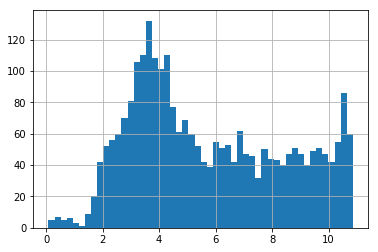


target 1 12.6407394841
30
0.04153157948766257 6.377968987994217 6.38483642112936


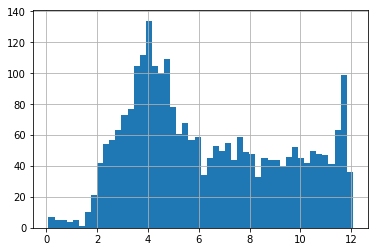


target 2 11.6683749084
30
0.03829068335622046 5.885998564240675 5.893312223169853


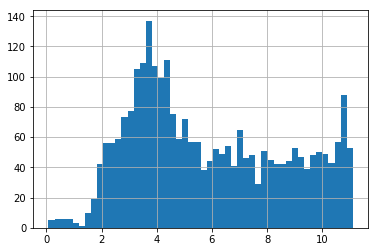


target 3 7.0496431738
30
0.024318240213568047 3.5493681358712603 3.55625916080014


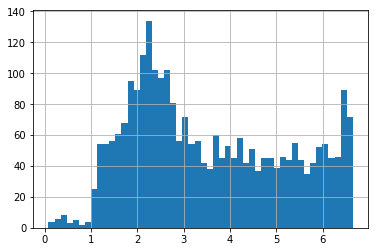


target 4 11.4252837645
30
0.03894891777030323 5.763794196353872 5.7703403808187534


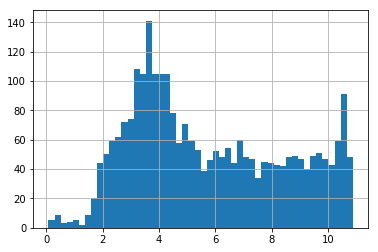


target 5 16.5301977869
30
0.05295773844795091 8.345866483531136 8.352576936911746


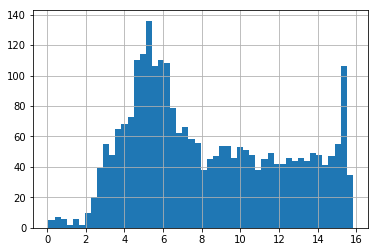


target 6 9.723645757
30
0.03226258676208946 4.902931549544868 4.910028915436746


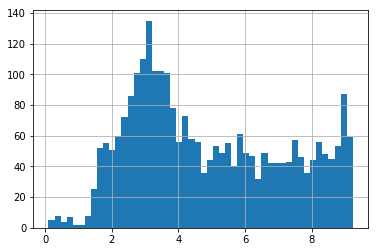


target 7 12.6407394841
30
0.04330139289566094 6.37793713211162 6.382839159188474


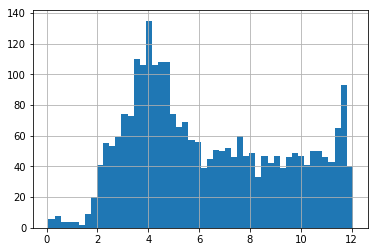


target 8 16.5301977869
30
0.05226492850007859 8.347168286085854 8.353392418925909


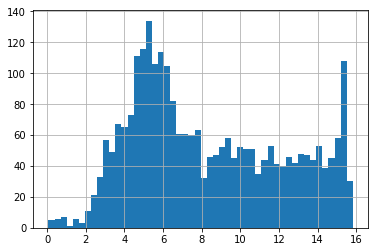

In [51]:
for t in range(len(config.target_lengths)):
    print "\ntarget", t, config.target_lengths[t]
    files= !ls /mnt/lanlep2019/input/sub/{GNO}/{t}/sub{GNO}*
    print len(files)
    b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
    b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
    b[b<0]=0
    print np.abs(b.median(1)-b.mean(1)).mean(),b.mean(1).mean(),b.median(1).mean()
    b.mean(1).hist(bins=50);plt.show();
    
    p=b.mean(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('mean',GNO,t))
    p.to_csv(fname,index=None)
    
    p=b.median(1).to_frame().reset_index()
    p.columns=['seg_id','time_to_failure']
    fname =os.path.join(sub_path, "{}_sub{}_at{}.csv".format('median',GNO,t))
    p.to_csv(fname,index=None)    

    #break

In [52]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/mean_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('mean',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.303669765657016 5.580276712868937


In [53]:
files= !ls /mnt/lanlep2019/input/sub/{GNO}/median_sub{GNO}_at?.csv
tidx=[ int(u.split('.')[-2][-1]) for u in files]
tweights=np.array([weights[i] for i in tidx])
tweights=tweights/np.sum(tweights)
print len(files),zip(tidx,tweights)

b=pd.concat([pd.read_csv(u, index_col=0) for u in files], axis=1)
b.columns=[  (u.split("/")[-1].split('.')[0]) for u in files]   
b=(b*tweights).sum(1)

p=b.to_frame().reset_index()
p.columns=['seg_id','time_to_failure']
fname =os.path.join(sub_path, os.path.join(sub_path, "weighted_{}_sub{}.csv".format('median',GNO)))
print p.mean()[0],p.median()[0]
p.to_csv(fname,index=None)

9 [(0, 0.154639175257732), (1, 0.154639175257732), (2, 0.154639175257732), (3, 0.030927835051546396), (4, 0.154639175257732), (5, 0.08247422680412372), (6, 0.030927835051546396), (7, 0.154639175257732), (8, 0.08247422680412372)]
6.310184169124292 5.607601832132862
